In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

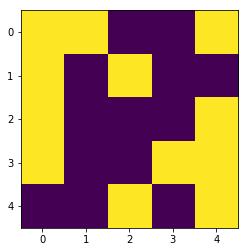

In [3]:
maze = np.array([[1, 1, 0, 0, 1],
                 [1, 0, 1, 0, 0],
                 [1, 0, 0, 0, 1],
                 [1, 0, 0, 1, 1],
                 [0, 0, 1, 0, 1]])

plt.imshow(maze)

In [4]:
alpha = 0.5
sigma = 1
state = 12

In [5]:
class Maze(object):
    
    actions = ['left', 'right', 'up', 'down'] 
    
    def __init__(self, maze, start_ij, alpha=0.5, sigma=0.9):
        self.maze = maze
        self.n_rows, self.n_cols = self.maze.shape
        self.n_states = self.maze.size
        self.n_actions = len(self.actions)
        self.states = np.arange(self.n_states) 
        self.state_ij = self._state_to_ij_map()
        self.ij_state = self._ij_to_state_map()
        self.exit_states = self._get_exit_states()
        
        self.q_grid = np.zeros((self.n_states, self.n_actions)) #q-value grid 
        self.r_grid = np.full((self.n_states, self.n_actions), -0.1) #reward grid 
        self.t_grid = np.repeat(self.states[:, None], self.n_actions, 1) #transition grid
        self._initialize_grids() 
        
        self.start_state = self.ij_state[start_ij]
        self.current_state = self.start_state
        self.alpha = alpha
        self.sigma = sigma
       
    def _ij_to_state_map(self):
        '''2d array containing state values'''
        return self.states.reshape(self.maze.shape)
    
    def _state_to_ij_map(self):
        '''list indexed by state containing i,j values'''
        return list(zip(*np.unravel_index(self.states, self.maze.shape)))
  
    def _initialize_grids(self):
        '''populate q-value, reward and transition grids'''
        
        grids = [self.q_grid, self.r_grid, self.t_grid]
                 
        for state in self.states:
            i, j = self.state_ij[state]
            
            # ignore exit states or "walls"
            if state in self.exit_states or self.maze[i, j] == 1:
                pass
            
            else:
                # set action rewards/transitions
                for action, action_name in enumerate(self.actions):
                    if action_name == 'up':
                        if self.maze[i-1, j] == 0:
                            # set next state                        
                            next_state = self.ij_state[i-1, j]                         
                            self.t_grid[state, action] = next_state                          
                            # set exit reward 
                            if next_state in self.exit_states:
                                self.r_grid[state, action] += 1


                    if action_name == 'down':
                        if self.maze[i+1, j] == 0:
                            # set next state                                                   
                            next_state = self.ij_state[i+1, j]
                            self.t_grid[state, action] = next_state                                                                              
                            # set exit reward 
                            if next_state in self.exit_states:
                                self.r_grid[state, action] += 1

                    if action_name == 'left':
                        if self.maze[i, j-1] == 0:                                                       
                            # set next state   
                            next_state = self.ij_state[i, j-1]
                            self.t_grid[state, action] = next_state
                            # set exit reward 
                            if next_state in self.exit_states:
                                self.r_grid[state, action] += 1

                        if action_name == 'right':
                            if self.maze[i, j+1] == 0:
                                # set next state 
                                next_state = self.ij_state[i, j+1]
                                self.t_grid[state, action] = next_state
                                # set exit reward 
                                if next_state in self.exit_states:
                                    self.r_grid[state, action] += 1
    
    def _get_exit_states(self):
        exit_states = [] 
        
        for state in self.states:
            i, j = self.state_ij[state]
            if i in (0, self.n_rows - 1) or j in (0, self.n_rows - 1):
                exit_states.append(state) 
       
        return exit_states
    
    def calculate_q(self, state, action):
        
        current_q = self.q_grid[state, action]
        
        reward = self.r_grid[state, action]
        
        next_state = self.t_grid[state, action]
        
        discounted_reward = self.q_grid[next_state].max()
        
        return self.alpha * (reward + (self.sigma * discounted_reward) - current_q)
    
    def take_action(self):
    
        
        best_action = np.argmax(self.q_grid[self.current_state])
        
        state_action = (self.current_state, best_action) 
        
        q_update = self.calculate_q(*state_action)
        
        # update q-value 
        self.q_grid[state_action] += q_update
        
        # update state
        self.current_state = self.t_grid[state_action]
        
        print('Action:', self.actions[best_action])
        print('Q update:', q_update) 
        print('New state:', self.current_state, end='\n\n') 
        
    def run_episode(self):
        self.current_state = self.start_state
        while self.current_state not in self.exit_states:
             self.take_action()
        

In [6]:
qmaze = Maze(maze, start_ij=(2,2))

In [14]:
for _ in range(100):
    qmaze.run_episode()

Action: left
Q update: -0.05
New state: 11

Action: left
Q update: -0.05
New state: 11

Action: right
Q update: -0.05
New state: 11

Action: up
Q update: -0.05
New state: 6

Action: left
Q update: -0.05
New state: 6

Action: right
Q update: -0.05
New state: 6

Action: up
Q update: -0.05
New state: 6

Action: down
Q update: -0.05
New state: 11

Action: down
Q update: -0.05
New state: 16

Action: left
Q update: -0.05
New state: 16

Action: right
Q update: -0.05
New state: 16

Action: up
Q update: -0.07250000000000001
New state: 11

Action: left
Q update: -0.04750000000000001
New state: 11

Action: right
Q update: -0.04750000000000001
New state: 11

Action: up
Q update: -0.04750000000000001
New state: 6

Action: left
Q update: -0.04750000000000001
New state: 6

Action: right
Q update: -0.04750000000000001
New state: 6

Action: up
Q update: -0.04750000000000001
New state: 6

Action: down
Q update: -0.04750000000000001
New state: 11

Action: down
Q update: -0.025
New state: 16

Action: down

New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down
Q update: 5.551115123125783e-17
New state: 21

Action: down
Q update: 5.551115123125783e-17
New state: 17

Action: left
Q update: 0.0
New state: 16

Action: down


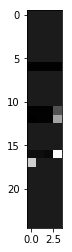

In [15]:
plt.imshow(qmaze.q_grid, cmap='gray') 